# Credit Card Fraud Detection

### Data: Number of Instances: 30000

In [1]:
# loading library
import pandas as pd
import numpy as np

#model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


### Import Data

In [2]:
# loading data
# create URL

# load dataset
dataframe = pd.read_excel("/Users/wangtingting/Documents/763-Project/default of credit card clients.xls", 
                          sheet_name = 0, header =1)

# view first two row
dataframe.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
dataframe.shape

(30000, 25)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
dataframe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# remove useless column
data_after_drop=dataframe.drop(['ID'], axis=1)
#There are 15 columns left
data_after_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
# check missing values
data_after_drop[data_after_drop['default payment next month'].isnull()].count()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [79]:
# rename target column 
df = data_after_drop.rename(columns={'default payment next month':'default_payment_next_month'})

#concatenate dataframe by column

df.columns

df1 = df

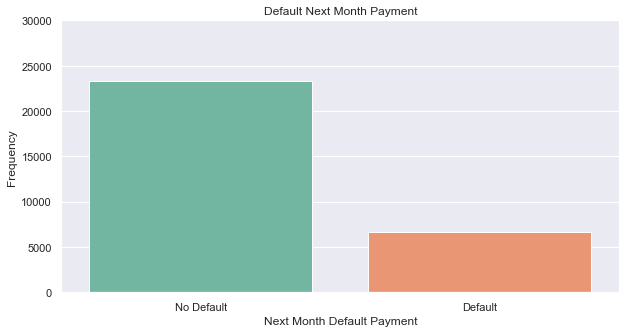

In [46]:
# check target balance or unbalance?
plt.title('Default Next Month Payment')
ax = sns.countplot(x = df.default_payment_next_month ,palette="Set2")
sns.set(font_scale= 1.0)
ax.set_ylim(top = 30000)
ax.set_xticklabels(['No Default','Default'])
ax.set_xlabel('Next Month Default Payment')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.show()

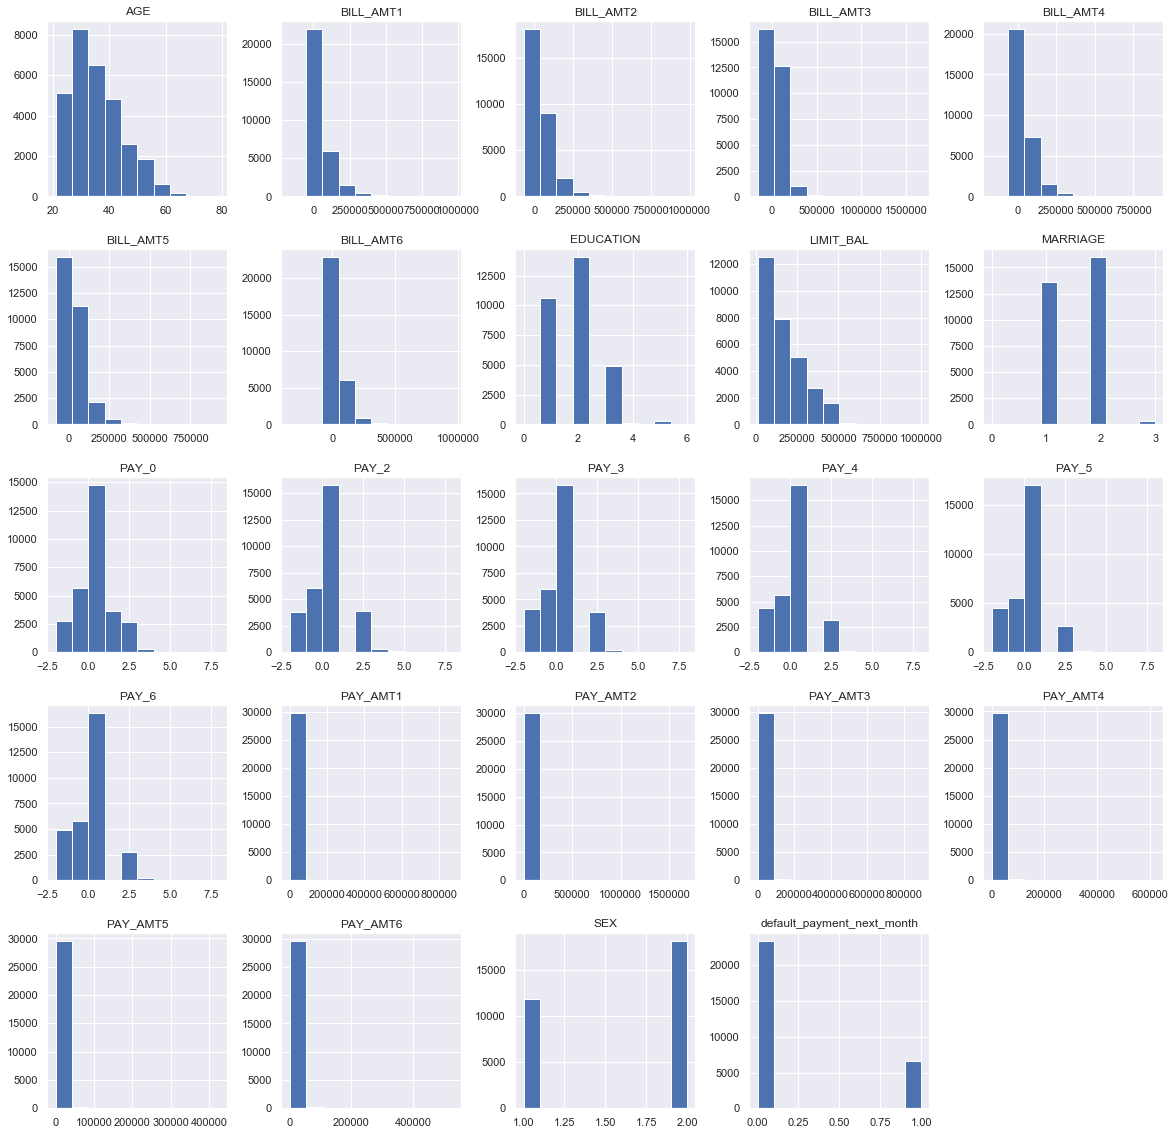

In [47]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

In [48]:
# delay pay
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


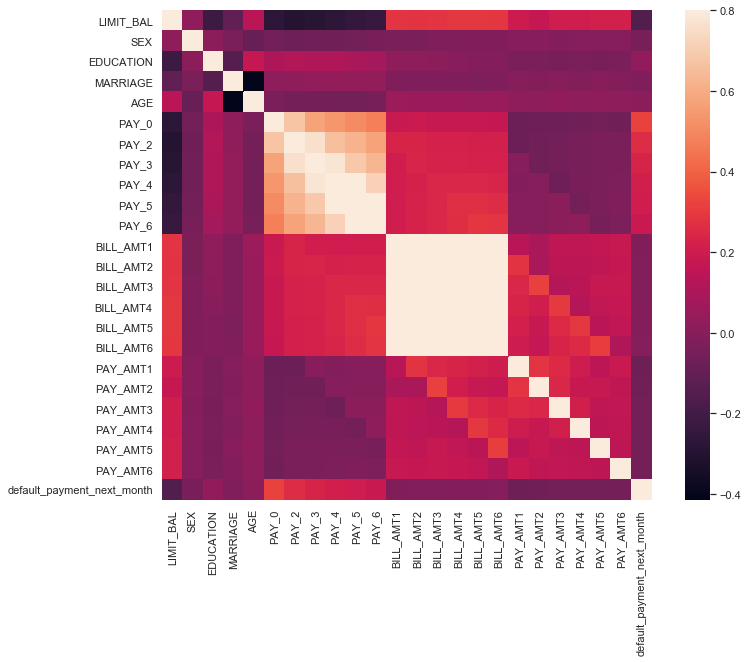

In [49]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

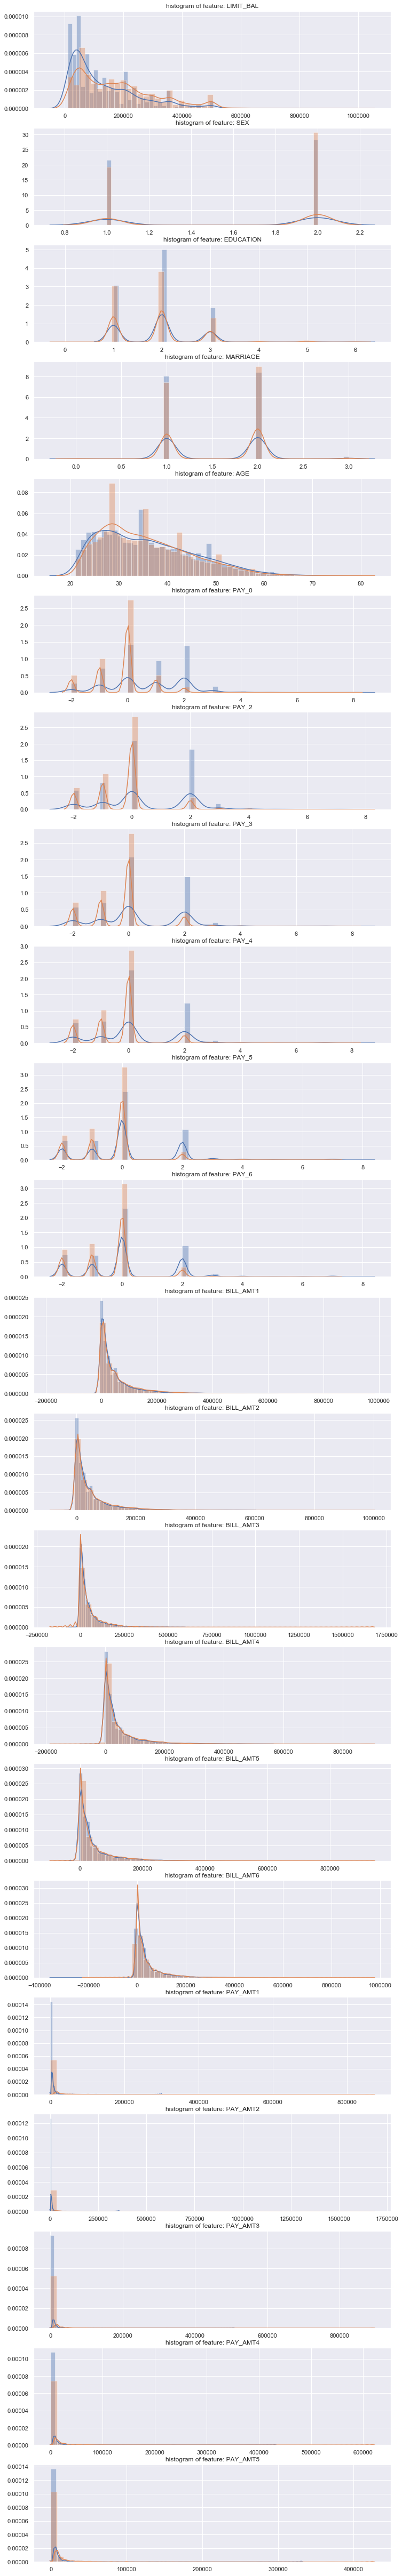

In [50]:
# distribution of anomalous features
features = df.iloc[:,0:22].columns
plt.figure(figsize=(12, 22*4))
gs = gridspec.GridSpec(22, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df['default_payment_next_month'] == 1], bins=50)
    sns.distplot(df[c][df['default_payment_next_month'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [51]:
# replace 1 (male) and 2(female) in 'sex' to 1(male) and 0(female)
SEX = df['SEX'].replace([1,2],[1,0])
df['SEX'] = SEX

In [52]:
# check max age
df['AGE'].max()

79

In [53]:
# check min age
df['AGE'].min()

21

In [54]:
# 1. Discretize variable into equal-sized buckets 
group_names=['under_30', '31to40', '41to50', '51to60','over60']
df["AGE"] = pd.qcut(df["AGE"],5, labels=group_names)

# 2. View df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,0,2,1,under_30,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,under_30,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,41to50,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,41to50,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,over60,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [55]:
# 3. View the number of default payment in each bucket. 
df[["AGE","default_payment_next_month"]].groupby(["AGE"],as_index = False).sum().sort_values(by="AGE",ascending=True)

,AGE,default_payment_next_month
0,under_30,1598
1,31to40,1102
2,41to50,1380
3,51to60,1100
4,over60,1456


In [56]:
# Age group: dummy variable
dum_df_age = pd.get_dummies(df["AGE"])

# merge with main df on key values
data_after_dummy_age = pd.concat([df, dum_df_age], axis=1)

# drop AGE column
data_after_dummy_age=data_after_dummy_age.drop(["AGE"], axis=1)

# drop one dummy variable 'over60'
data_after_dummy_age=data_after_dummy_age.drop(["over60"], axis=1)

data_after_dummy_age

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,under_30,31to40,41to50,51to60
0,20000,0,2,1,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,1,0,0,0
1,120000,0,2,2,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,1,0,0,0
2,90000,0,2,2,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,1,0
3,50000,0,2,1,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,1,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,0,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,0,0,0,1
29996,150000,1,3,2,-1,-1,-1,-1,0,0,...,3526,8998,129,0,0,0,0,0,0,1
29997,30000,1,2,2,4,3,2,-1,0,0,...,0,22000,4200,2000,3100,1,0,0,1,0
29998,80000,1,3,1,1,-1,0,0,0,-1,...,3409,1178,1926,52964,1804,1,0,0,0,1


In [57]:
# dummy variable - EDUCATION column
data_after_dummy_age['EDUCATION'].replace({1:"graduate_school", 2:"university", 3:"high school", 4:"others"}, inplace=True)
dum_df = pd.get_dummies(data_after_dummy_age["EDUCATION"],prefix="EDUCATION")

# merge with main df on key values
data_after_dummy_EDUCATION = pd.concat([data_after_dummy_age, dum_df], axis=1)
data_0=data_after_dummy_EDUCATION.drop(["EDUCATION"], axis=1)
data_0

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,31to40,41to50,51to60,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_graduate_school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,0,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,2,-1,2,0,0,0,2,2682,...,0,0,0,0,0,0,0,0,0,1
2,90000,0,2,0,0,0,0,0,0,29239,...,0,1,0,0,0,0,0,0,0,1
3,50000,0,1,0,0,0,0,0,0,46990,...,0,1,0,0,0,0,0,0,0,1
4,50000,1,1,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,0,0,0,0,0,0,188948,...,0,0,1,0,0,0,0,1,0,0
29996,150000,1,2,-1,-1,-1,-1,0,0,1683,...,0,0,1,0,0,0,0,1,0,0
29997,30000,1,2,4,3,2,-1,0,0,3565,...,0,1,0,0,0,0,0,0,0,1
29998,80000,1,1,1,-1,0,0,0,-1,-1645,...,0,0,1,0,0,0,0,1,0,0


In [58]:
# dummy variable - MARRIAGE column
data_0['MARRIAGE'].replace({1:"married", 2:"single", 3:"others"}, inplace=True)
dum_df = pd.get_dummies(data_0["MARRIAGE"],prefix="MARRIAGE")
dum_df

,MARRIAGE_0,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,0,1
29997,0,0,0,1
29998,0,1,0,0


In [59]:
# merge with main df on key values
data_after_dummy_MARRIAGE = pd.concat([data_0, dum_df], axis=1)
data_1 = data_0.drop(["MARRIAGE"], axis=1)
data_1

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,31to40,41to50,51to60,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_graduate_school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,0,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,0,0,1
2,90000,0,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,0,0,1
3,50000,0,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,0,0,1
4,50000,1,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,0,0,0,0,0,0,188948,192815,...,0,0,1,0,0,0,0,1,0,0
29996,150000,1,-1,-1,-1,-1,0,0,1683,1828,...,0,0,1,0,0,0,0,1,0,0
29997,30000,1,4,3,2,-1,0,0,3565,3356,...,0,1,0,0,0,0,0,0,0,1
29998,80000,1,1,-1,0,0,0,-1,-1645,78379,...,0,0,1,0,0,0,0,1,0,0


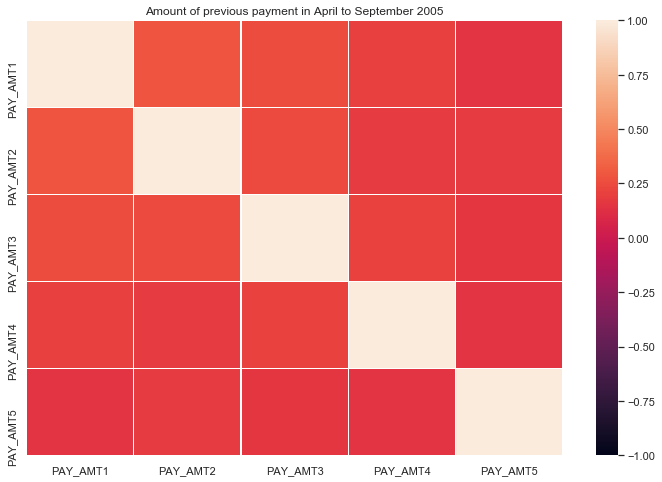

In [60]:
# check the correlation of Amount of previous payment in April to September 2005.

var1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (12,8))
plt.title('Amount of previous payment in April to September 2005')
corr = data_1[var1].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

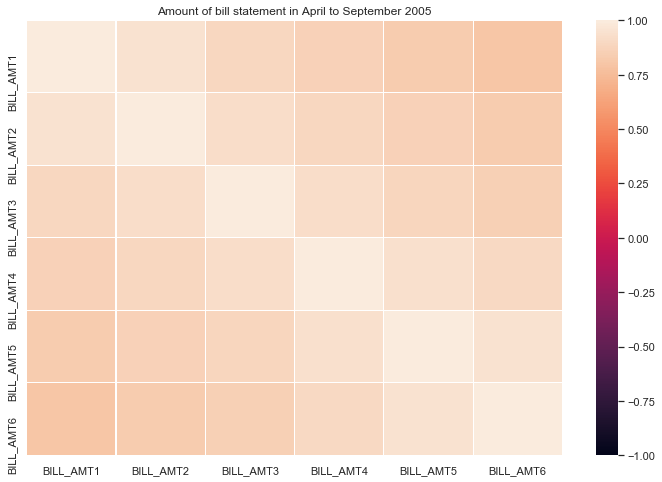

In [61]:
# check the correlation of Amount of bill statement in April to September 2005.

var2 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (12,8))
plt.title('Amount of bill statement in April to September 2005')
corr = data_1[var2].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

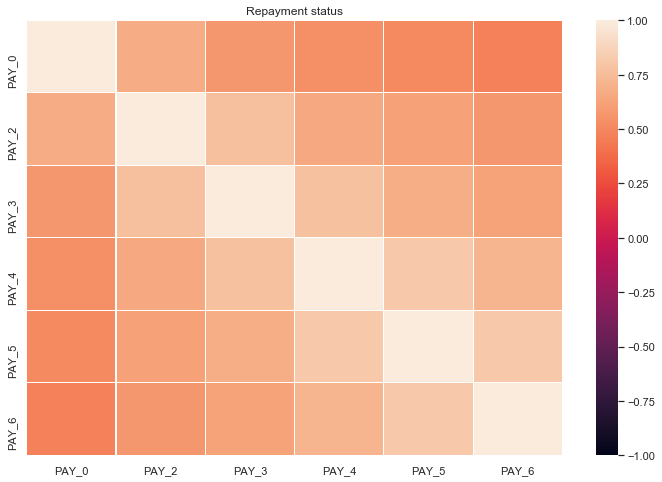

In [62]:
# check the correlation between Repayment status in April to September 2005.

var3 = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (12,8))
plt.title('Repayment status')
corr = data_1[var3].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

In [63]:
data_1.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'under_30', '31to40', '41to50', '51to60', 'EDUCATION_0', 'EDUCATION_5',
       'EDUCATION_6', 'EDUCATION_graduate_school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university'],
      dtype='object')

In [64]:
#StandardScaller is being used to normalize the features
from sklearn.preprocessing import StandardScaler

standardized_features = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                         'PAY_0',  'PAY_2',  'PAY_3',  'PAY_4', 'PAY_5', 'PAY_6',
                         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

numeric_features = data_1[standardized_features]
sc = StandardScaler()
standardized = pd.DataFrame(sc.fit_transform(numeric_features))
standardized.columns = ['LIMIT_BAL',
                         'PAY_0',
                         'PAY_2',
                         'PAY_3',
                         'PAY_4',
                         'PAY_5',
                         'PAY_6',
                         'BILL_AMT1',
                         'BILL_AMT2',
                         'BILL_AMT3',
                         'BILL_AMT4',
                         'BILL_AMT5',
                         'BILL_AMT6',
                         'PAY_AMT1',
                         'PAY_AMT2',
                         'PAY_AMT3',
                         'PAY_AMT4',
                         'PAY_AMT5',
                         'PAY_AMT6']

data = data_1.copy()
data[standardized_features] = standardized

In [65]:
data.head()

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,31to40,41to50,51to60,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_graduate_school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,-1.136720,0,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,0,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,0,0,0,0,0,0,0,0,0,1
2,-0.597202,0,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,0,1,0,0,0,0,0,0,0,1
3,-0.905498,0,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,0,1,0,0,0,0,0,0,0,1
4,-0.905498,1,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,0,0,0,0,0,0,0,0,0,1
